### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_csv('Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

The dataset has 7043 rows and 21 columns

In [4]:
#checking null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The dataset doesnt show any null values

In [5]:
#checking datatypes
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The data set has numerical and object values

In [6]:
#checking unique values
for i in df.columns:
    print("no of unique values in",i,':', df[i].nunique())

no of unique values in customerID : 7043
no of unique values in gender : 2
no of unique values in SeniorCitizen : 2
no of unique values in Partner : 2
no of unique values in Dependents : 2
no of unique values in tenure : 73
no of unique values in PhoneService : 2
no of unique values in MultipleLines : 3
no of unique values in InternetService : 3
no of unique values in OnlineSecurity : 3
no of unique values in OnlineBackup : 3
no of unique values in DeviceProtection : 3
no of unique values in TechSupport : 3
no of unique values in StreamingTV : 3
no of unique values in StreamingMovies : 3
no of unique values in Contract : 3
no of unique values in PaperlessBilling : 2
no of unique values in PaymentMethod : 4
no of unique values in MonthlyCharges : 1585
no of unique values in TotalCharges : 6531
no of unique values in Churn : 2


all values in customer id are unique, can be ignored
the total charges also has a large number of unique values

In [7]:
df.drop(['customerID'],inplace=True,axis=1)

In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Male      3555
Female    3488
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

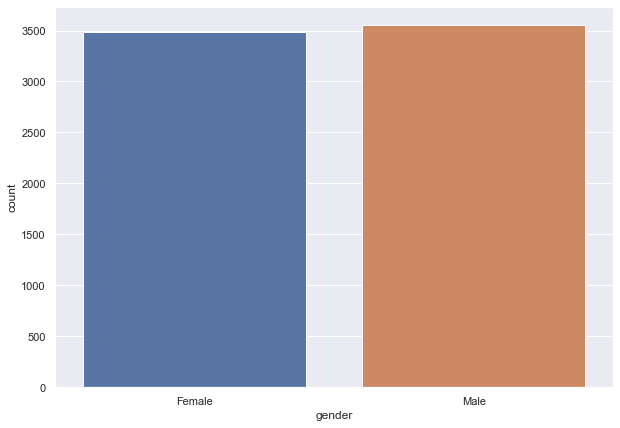

In [9]:
#checking the clumns with categorical data
sns.set_theme(style="darkgrid")
print(df['gender'].value_counts())
plt.figure(figsize=(10,7))
##plt.xticks(rotation=-50)
sns.countplot(df['gender'])

The gender column has male and female sub categories

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

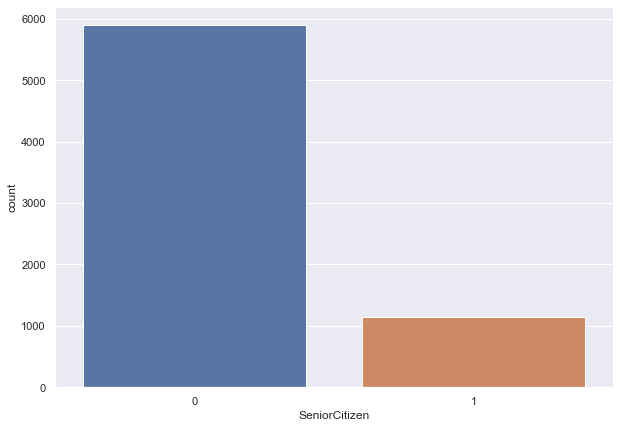

In [10]:
#checking the clumns with categorical data
print(df['SeniorCitizen'].value_counts())
plt.figure(figsize=(10,7))
##plt.xticks(rotation=-50)
sns.countplot(df['SeniorCitizen'])

Categorical elements catogorising if the user is seniour citizen, majority in the dataset are not senior citizen

In [11]:
#grouping category and numerical columns
cat_cols=[]
num_cols=[]
for i in df.columns:
    if df[i].dtypes=='object':
        cat_cols.append(i)
    else:
        num_cols.append(i)
print(cat_cols)
num_cols

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [12]:
#since the total charges is a numerical column redefining the lists
cat_cols=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
num_cols=['SeniorCitizen', 'tenure', 'MonthlyCharges']

---- gender ------
Male      3555
Female    3488
Name: gender, dtype: int64


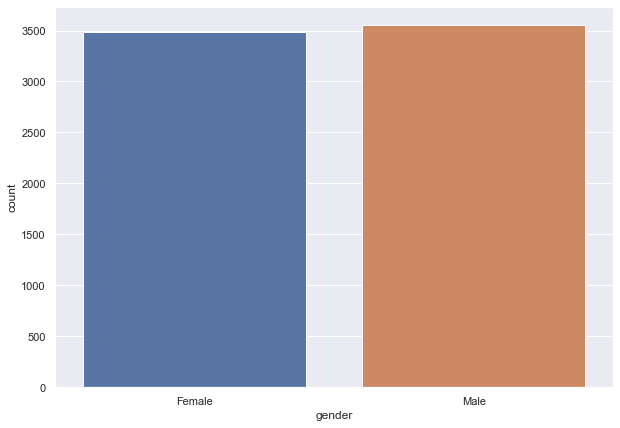

---- Partner ------
No     3641
Yes    3402
Name: Partner, dtype: int64


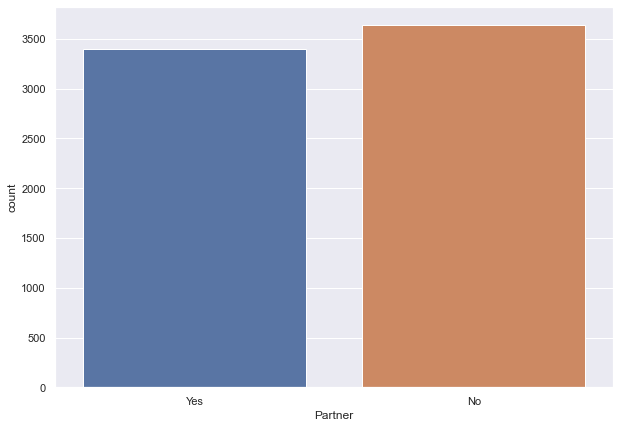

---- Dependents ------
No     4933
Yes    2110
Name: Dependents, dtype: int64


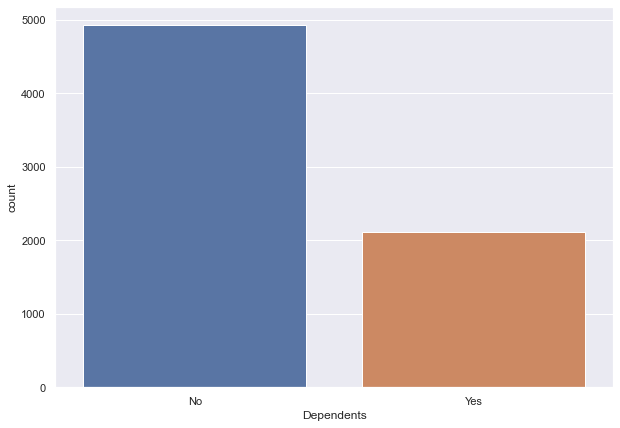

---- PhoneService ------
Yes    6361
No      682
Name: PhoneService, dtype: int64


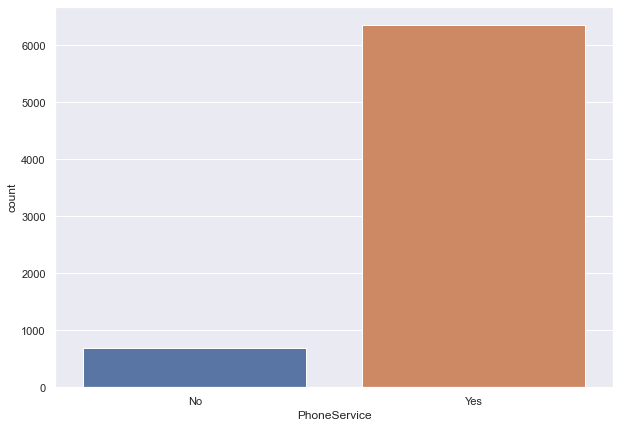

---- MultipleLines ------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


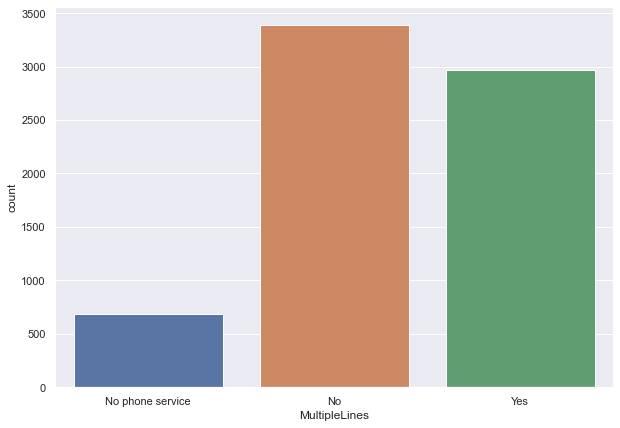

---- InternetService ------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


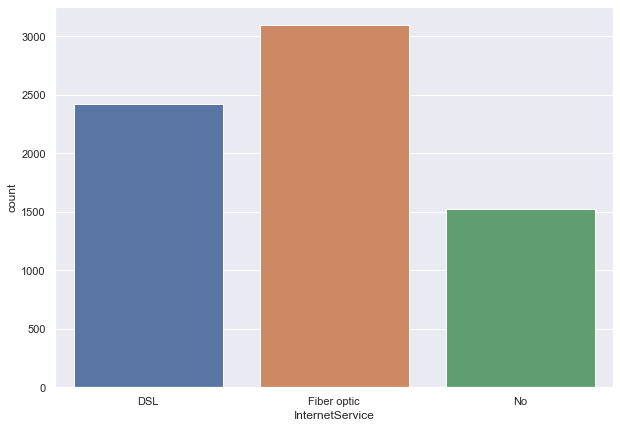

---- OnlineSecurity ------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


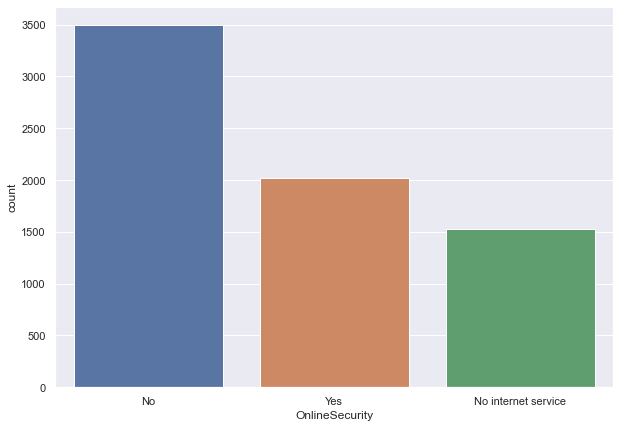

---- OnlineBackup ------
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


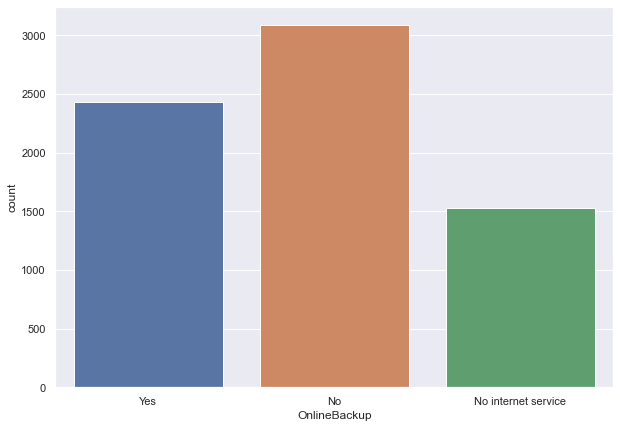

---- DeviceProtection ------
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


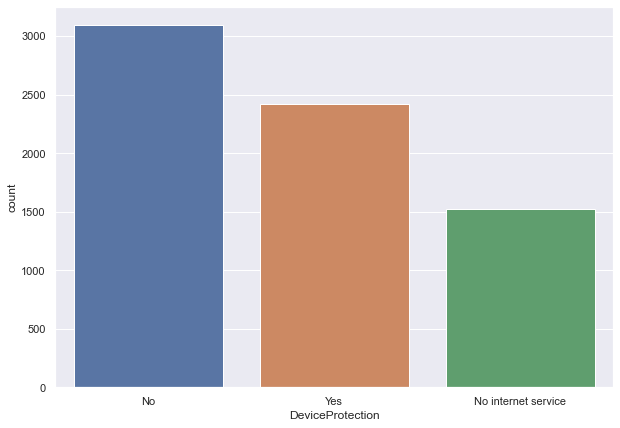

---- TechSupport ------
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


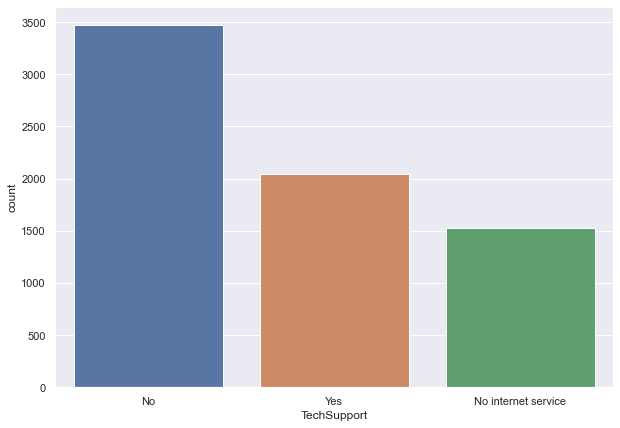

---- StreamingTV ------
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


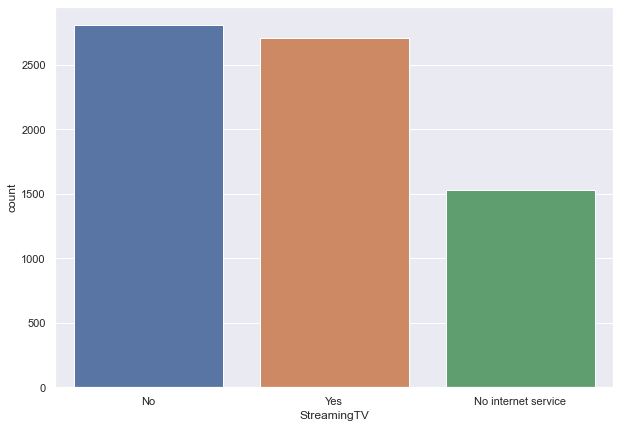

---- StreamingMovies ------
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


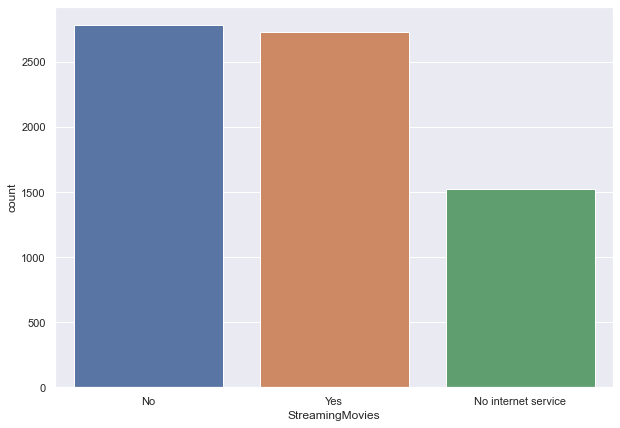

---- Contract ------
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


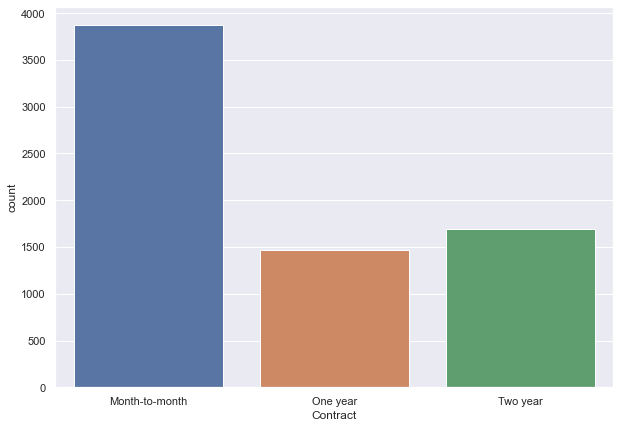

---- PaperlessBilling ------
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


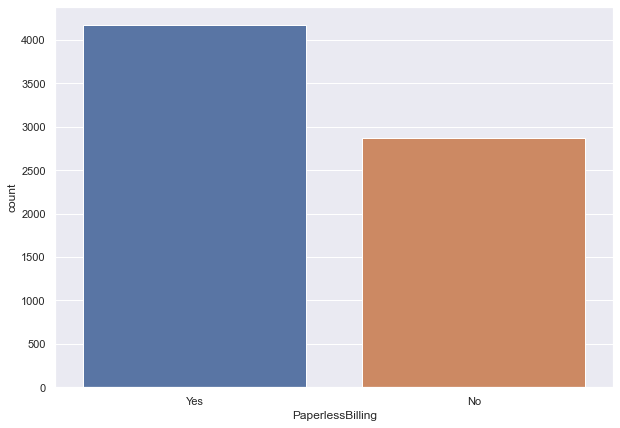

---- PaymentMethod ------
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


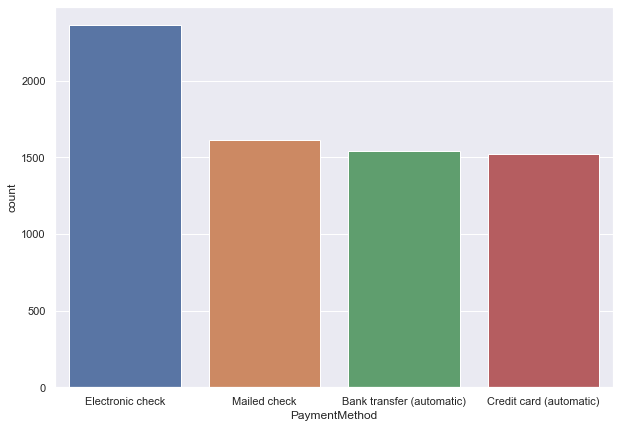

---- Churn ------
No     5174
Yes    1869
Name: Churn, dtype: int64


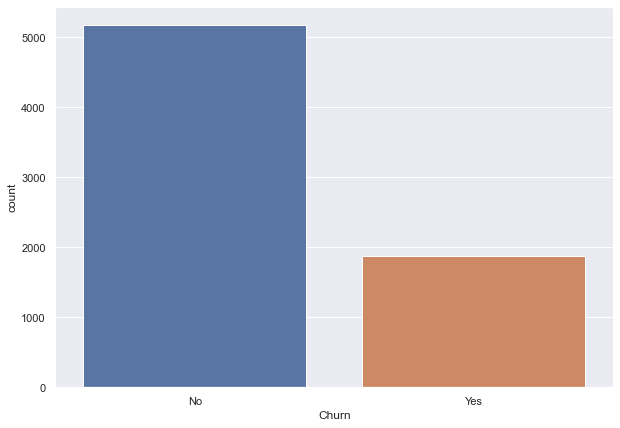

In [13]:
for i in cat_cols:
    print('----',i,'------')
    plt.figure(figsize=(10,7))
    ##plt.xticks(rotation=-50)
    ax=sns.countplot(df[i])
    print(df[i].value_counts())
    plt.show()


Majority in the dataset doesnt have a parner

Majority doesnt have any dependance

All most all the customers have phone service

There is is significant amount people with multiple phone lines

Majority of the customers have fiber optic internet connection followed by DSL

Large amount of customers doesnt have internet security,online backup, Device protection,tech support

eventhough many have streming tv and streamimng movies, the significant number of users doesnt have any

many users have a month to month plan subscription

Large amount of users choose paperless billing

Most elected payment method is elctronic check

The target column looks imbalanced





---- SeniorCitizen ------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


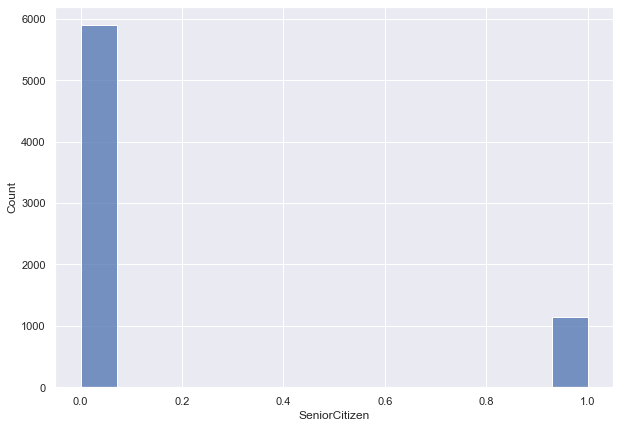

---- tenure ------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


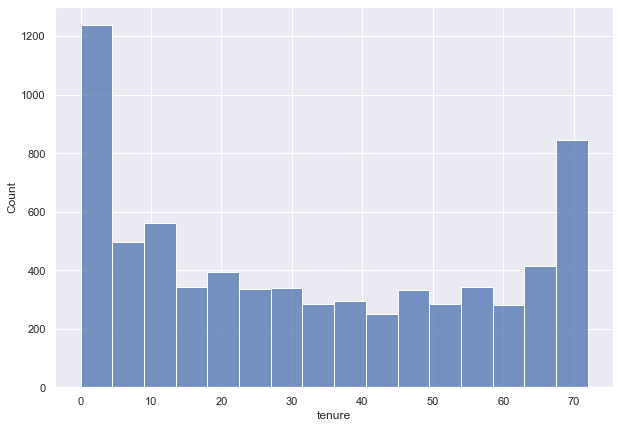

---- MonthlyCharges ------
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64


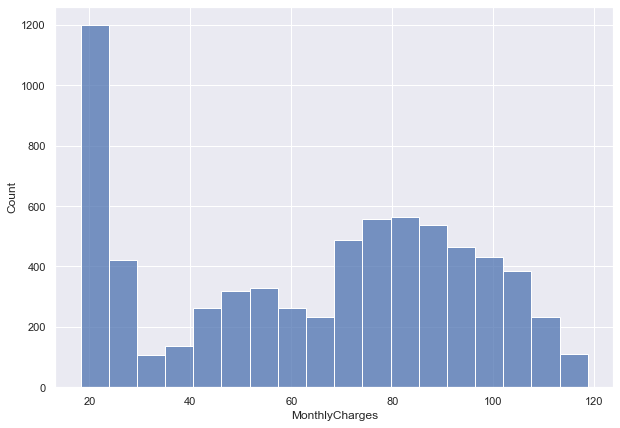

In [14]:
#checking numerical columns
for i in num_cols:
    print('----',i,'------')
    print(df[i].value_counts())
    plt.figure(figsize=(10,7))
    ##plt.xticks(rotation=-50)
    ax=sns.histplot(df[i])
    
    plt.show()

the senior citizens column is categorical

Tenure ranges from 0--70

Monhly charge ranges from 20 to around 120, with majority chose 20 plan

In [15]:
#checking Total charges column
print(df['TotalCharges'].value_counts())

           11
20.2       11
19.75       9
19.65       8
19.9        8
           ..
302.6       1
208.25      1
6281.45     1
1049.05     1
1679.65     1
Name: TotalCharges, Length: 6531, dtype: int64


In [16]:
#checking for white spaces
df.loc[df['TotalCharges'] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There seems to be white spaces in the data, changing it to NaN


In [17]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

In [18]:
#checking nan
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
#changing datatype of total charges
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [20]:
#replacing nan values with mean
df['TotalCharges']=df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [21]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

20.200000      11
2283.300441    11
19.750000       9
19.900000       8
19.650000       8
               ..
1066.150000     1
249.950000      1
8333.950000     1
7171.700000     1
1024.000000     1
Name: TotalCharges, Length: 6531, dtype: int64


<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

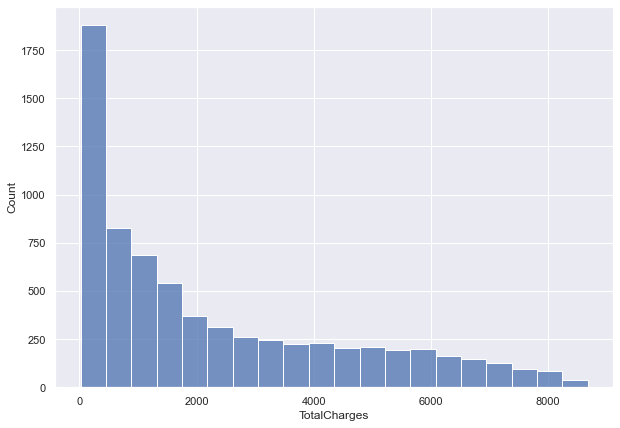

In [22]:
#plotting total charges
#checking columns with null values
print(df['TotalCharges'].value_counts())
plt.figure(figsize=(10,7))
sns.histplot(df['TotalCharges'],bins=20)

Total charges vary from 0 to 8000+


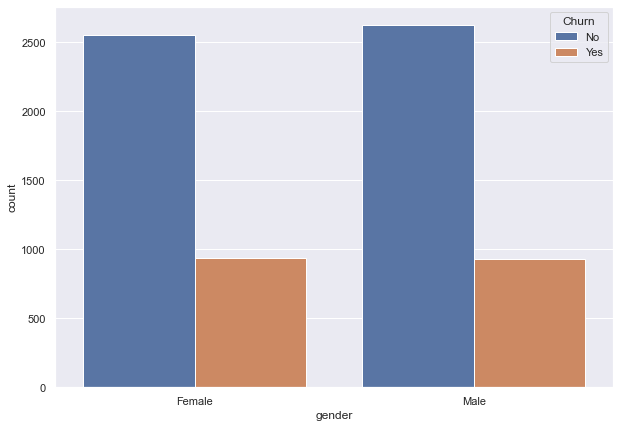

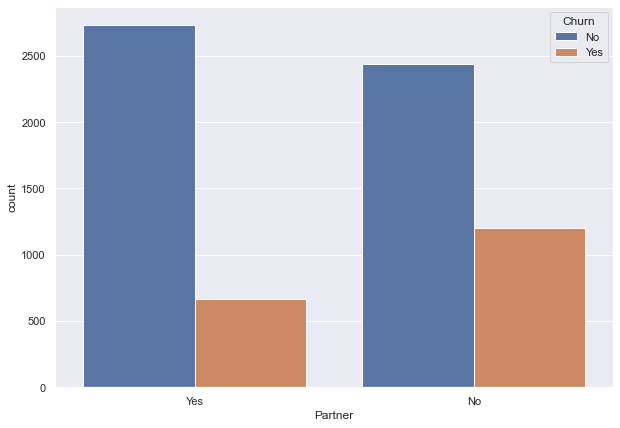

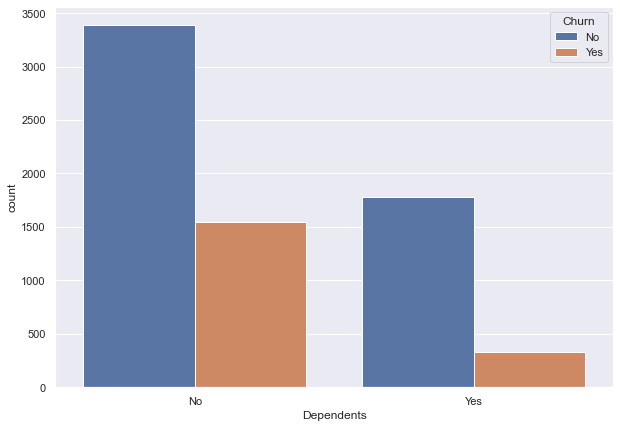

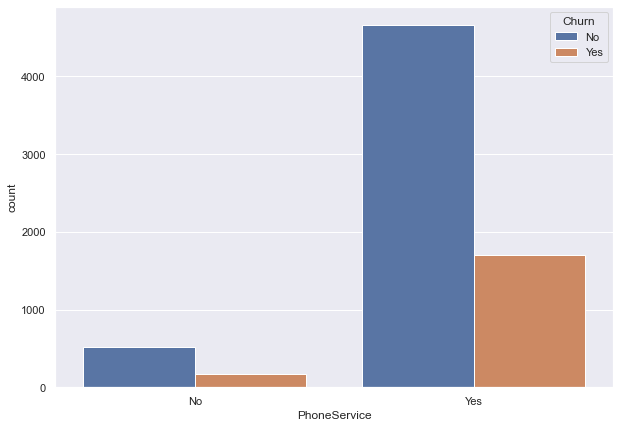

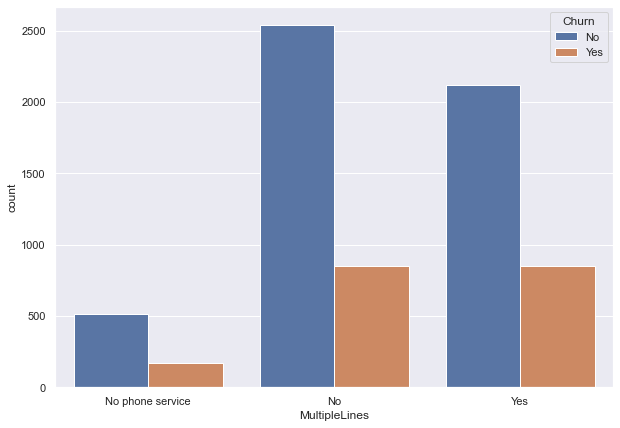

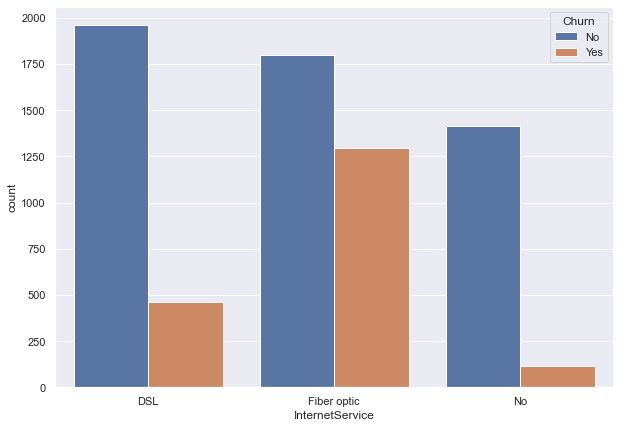

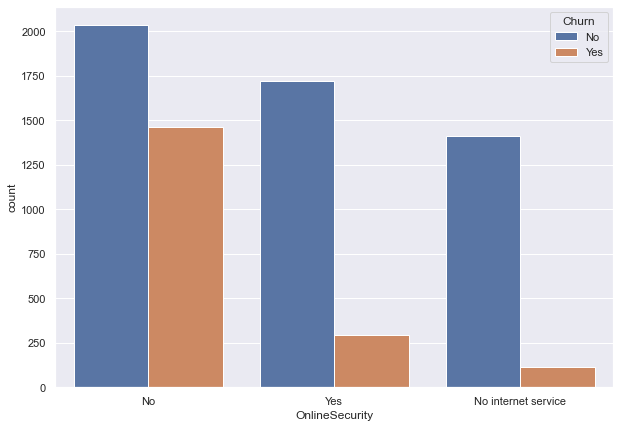

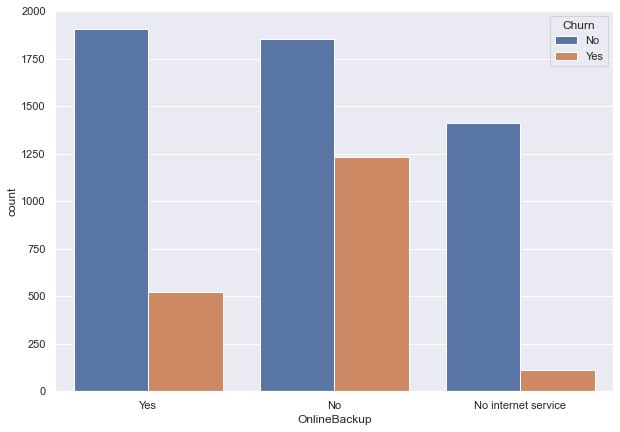

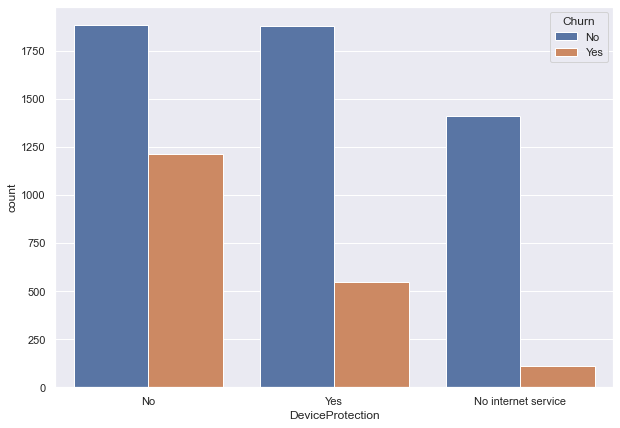

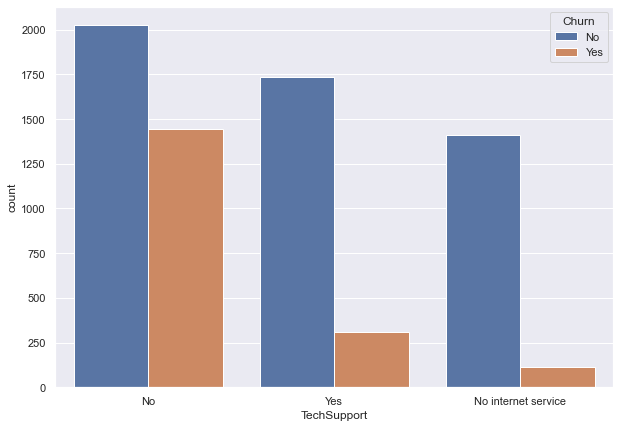

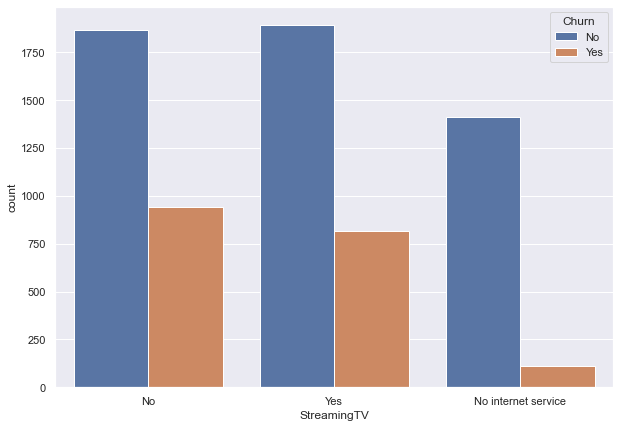

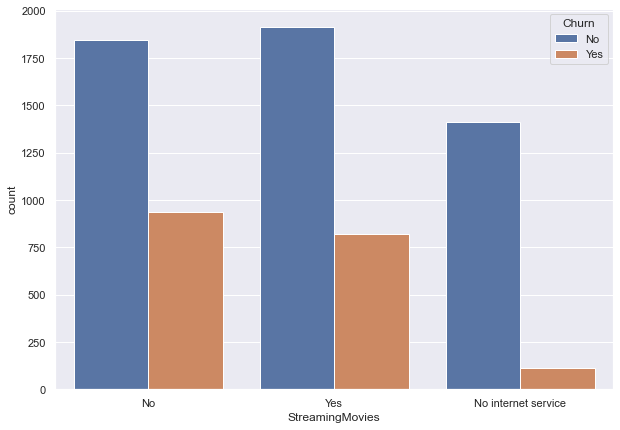

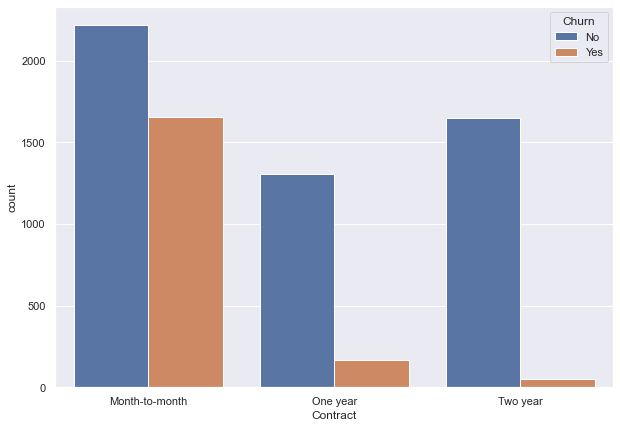

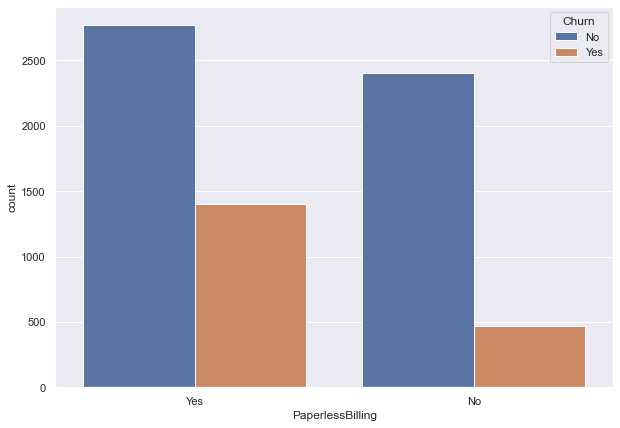

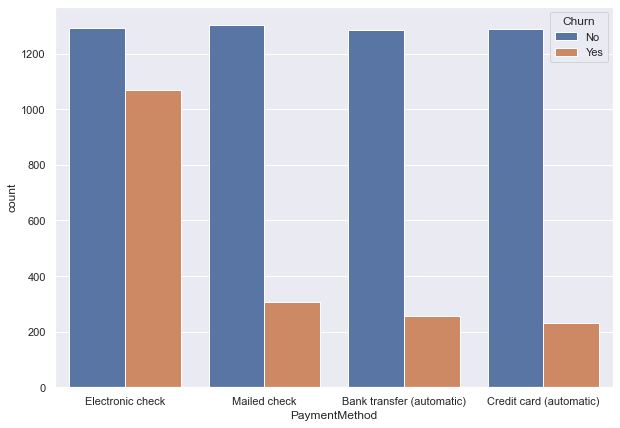

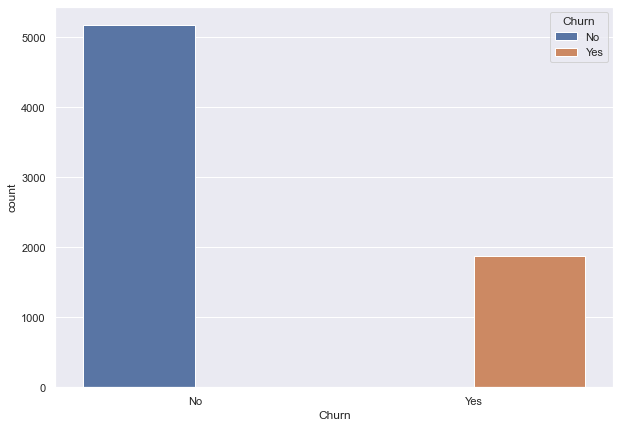

In [23]:
#comparng with the target column
for i in cat_cols:
    plt.figure(figsize=(10,7))
    ##plt.xticks(rotation=-50)
    ax=sns.countplot(df[i],hue='Churn',data=df)
    plt.show()

Churn value in gender seems balanced to male and female

People who are single,with no dependents,with phone service,with fiber optic internet cnnection,no online security
no online backup,no device protection,no tech support, no streaming tv or movies
seems to leave the service often

People with multiple lines data seems balanced

Month-tomonth subscribers tends to not reuse the service.

People who prefer paperless billing, who use electronic check tends to leave the service




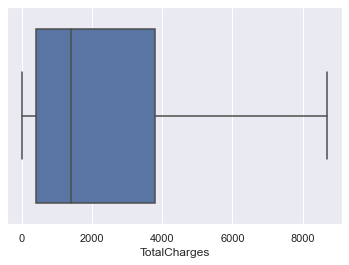

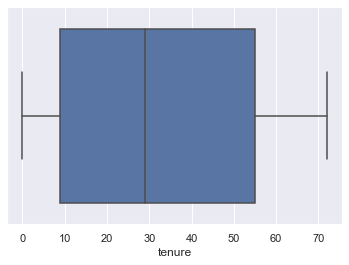

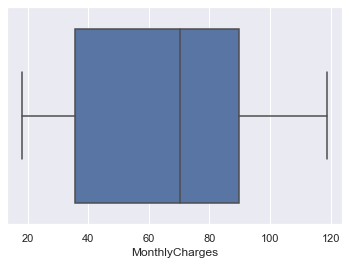

In [24]:
#checking outliers
cols=['TotalCharges', 'tenure', 'MonthlyCharges']
for i in cols:
    sns.boxplot(df[i])
    plt.show()

The data doesnt show the presence of outliers

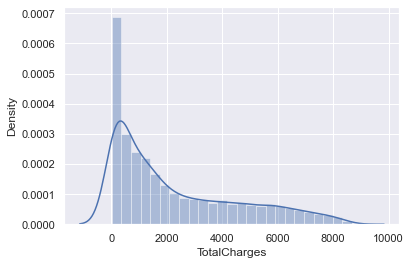

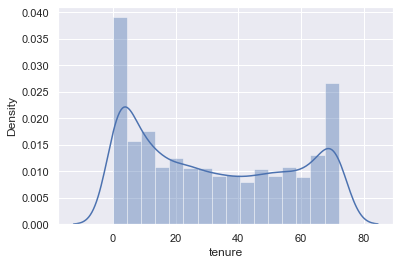

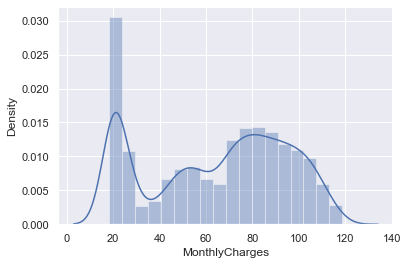

In [25]:
#checking skewness
for i in cols:
    sns.distplot(df[i])
    plt.show()

There seems to be skewness in the total charges and monthly charges

In [26]:
#encoding dataset
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))

In [27]:
#describing data
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [28]:
#checking correlation
dfcor=df.corr()
dfcor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


<AxesSubplot:>

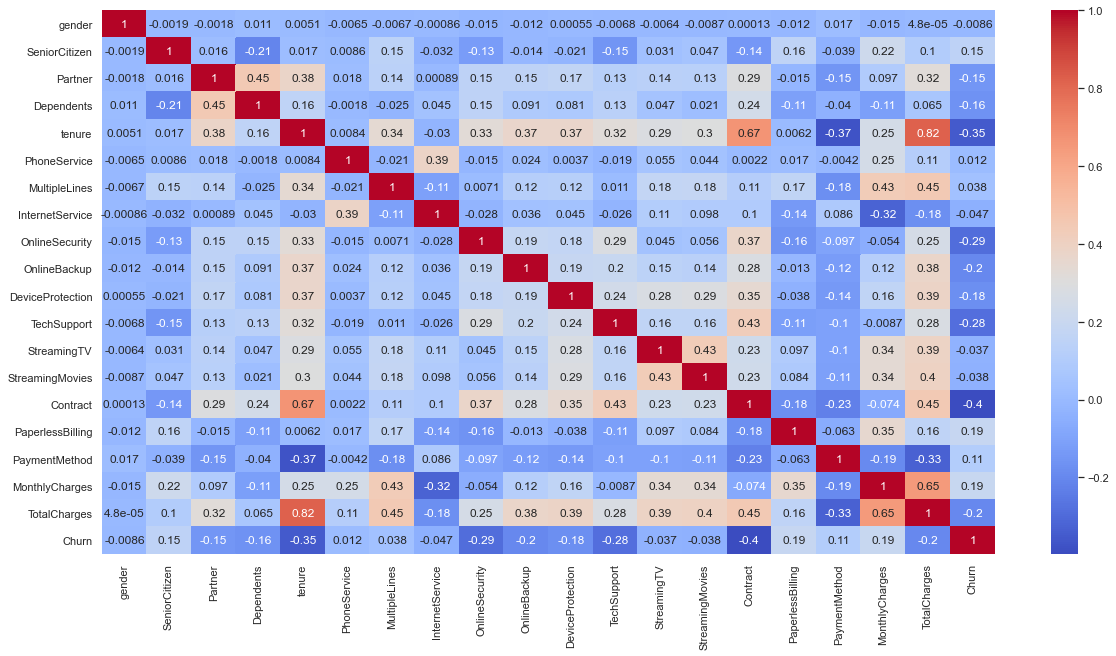

In [29]:
#plotting correlation
plt.figure(figsize = (20,10))
sns.heatmap(dfcor,annot=True,cmap="coolwarm")

The paperless billing seems to be having high correlation to the churn value

In [30]:
#correlation to target
dfcor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199428
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

Monthly charges and paperless billing has a possitive correlation

Tenure and contract have the highest negative correlation

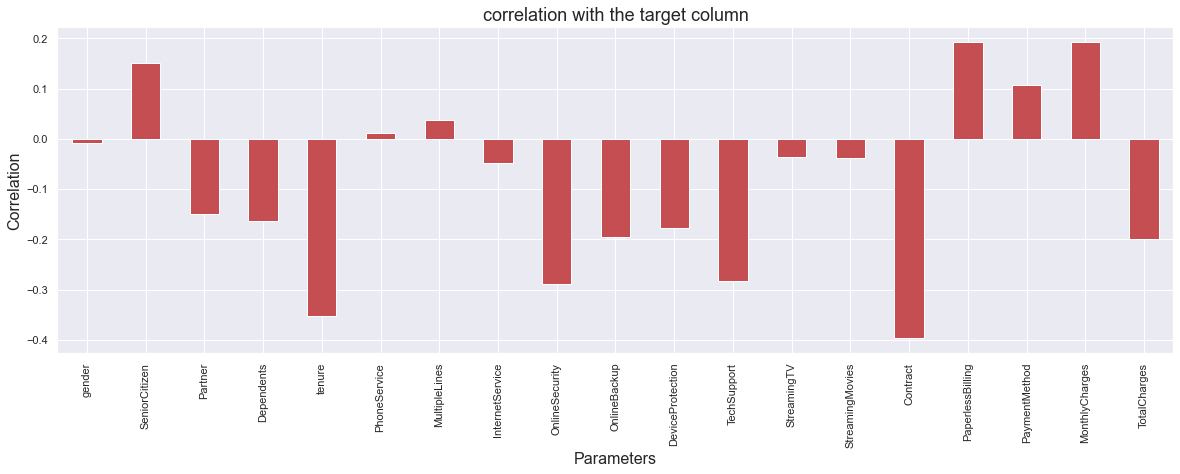

In [31]:
#plotting correlation to target
plt.figure(figsize = (20,6))
dfcor['Churn'].drop(['Churn']).plot(kind = 'bar', color = 'r')
plt.xlabel('Parameters', fontsize = 16)
plt.ylabel('Correlation', fontsize = 16)
plt.title('correlation with the target column', fontsize = 18)
plt.show()

In [32]:
#splitting x and y
x = df.drop('Churn', axis = 1)
y = df['Churn']

In [33]:
print(x.shape,y.shape)

(7043, 19) (7043,)


In [34]:
#handling imbalance
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)

In [35]:
#scaling

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x_over)

In [36]:
#importing models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [37]:
#checking the best random state

lr=LogisticRegression()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = .30, random_state = i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test, predlr)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best accuracy',maxacc,'on random state',maxrs)

best accuracy 0.785829307568438 on random state 140


In [45]:
#spitting with best random state
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = .30, random_state = 140)

In [46]:
print(x_train.shape,y_train.shape,y_test.shape,x_test.shape)

(7243, 19) (7243,) (3105,) (3105, 19)


In [47]:
def model(mod):
    print("Model:",mod)
    mod.fit(x_train, y_train)
    mod.score(x_train, y_train)
    pred = mod.predict(x_test)
    ##print(confusion_matrix(y_test, pred))
    print('\n')
    print('\n')
    ##print(classification_report(y_test, pred))
    crossval_scores = cross_val_score(mod, x_over, y_over, cv = 5)
    accuracy=accuracy_score(y_test, pred)
    print("Accuracy score:",accuracy)
    ##print('Cross validation Scores for ', mod)
    ##print(crossval_scores)
    print('\n')
    mean_crossval=crossval_scores.mean()
    print('Mean cross validation Score: ',mean_crossval)
    difference=accuracy-mean_crossval
    print('difference between crossvalidation score and actual score:',difference)

In [48]:
model(LogisticRegression())

Model: LogisticRegression()




Accuracy score: 0.785829307568438


Mean cross validation Score:  0.767589280919392
difference between crossvalidation score and actual score: 0.018240026649046004


In [49]:
model(GaussianNB())

Model: GaussianNB()




Accuracy score: 0.7761674718196457


Mean cross validation Score:  0.7659474226154201
difference between crossvalidation score and actual score: 0.01022004920422559


In [50]:
model(DecisionTreeClassifier())

Model: DecisionTreeClassifier()




Accuracy score: 0.814170692431562


Mean cross validation Score:  0.7979455640312597
difference between crossvalidation score and actual score: 0.016225128400302324


In [51]:
model(AdaBoostClassifier())

Model: AdaBoostClassifier()




Accuracy score: 0.8454106280193237


Mean cross validation Score:  0.8318642579789532
difference between crossvalidation score and actual score: 0.013546370040370403


In [52]:
model(RandomForestClassifier())

Model: RandomForestClassifier()




Accuracy score: 0.8618357487922705


Mean cross validation Score:  0.8397938746109466
difference between crossvalidation score and actual score: 0.022041874181323973


In [53]:
model(DecisionTreeClassifier())

Model: DecisionTreeClassifier()




Accuracy score: 0.8154589371980676


Mean cross validation Score:  0.7985264416285492
difference between crossvalidation score and actual score: 0.01693249556951837


DecisionTreeClassifier() seems to be having a very minimal cross validation difference, selecting the same

### Hyper-parameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy'], 'min_samples_leaf': ['10', '17', '50',100], 'max_depth': [2, 7, 9,12,15],'min_samples_split':[2,3,5,7,9]}

In [55]:
dtc = DecisionTreeClassifier()
dtc_f = GridSearchCV(dtc, parameters)
dtc_f.fit(x_train, y_train)

print(dtc_f.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 100, 'min_samples_split': 7}


In [56]:
dtc_final = DecisionTreeClassifier(criterion = 'entropy',max_depth=9,min_samples_leaf=100,min_samples_split=7)
dtc_final.fit(x_train, y_train)
pred_dtc = dtc_final.predict(x_test)
print('Accuracy Score  : ', dtc_final)
print(accuracy_score(y_test, pred_dtc))
print(confusion_matrix(y_test, pred_dtc))
print(classification_report(y_test, pred_dtc))

Accuracy Score  :  DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=100,
                       min_samples_split=7)
0.8009661835748793
[[1220  368]
 [ 250 1267]]
              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80      1588
         1.0       0.77      0.84      0.80      1517

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



### We are getting an accuracy score of 0.8009661835748793

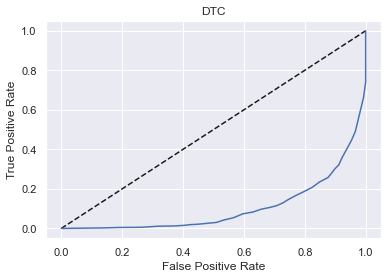

auc score: 0.801731509724383


In [57]:
#plotting Auc_ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob = dtc_final.predict_proba(x_test)[:, 0]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label = 'Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DTC')
plt.show()
auc_score = roc_auc_score(y_test, dtc_final.predict(x_test))
print('auc score:',auc_score)

In [59]:
#Saving model
import joblib
joblib.dump(dtc_final, 'Customer_churn.obj')

['Customer_churn.obj']

In [61]:
final = joblib.load('Customer_churn.obj')
final.predict(x_train)

array([0., 0., 1., ..., 0., 0., 1.])

In [62]:
data = [pred_dtc, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,3095,3096,3097,3098,3099,3100,3101,3102,3103,3104
Predicted,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
Actual,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


### accuracy score of 0.8009661835748793